# 2D 绘图

## 公共操作

在执行代码前, 需要先执行该代码块

In [4]:
import sys

# 将项目根路径加入系统路径
sys.path.append("../..")

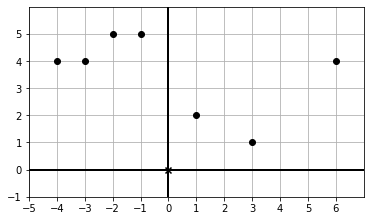

In [5]:
from common.vector_draw import Points, draw

# 定义一个 2D 向量
# 2D 向量是一组点的集合
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
]

# 在坐标轴上绘制向量
draw(
    Points(*dino_vectors),
)